In [6]:
# Create an empty list to store arrays from each file
data_list = []
import os
import numpy as np

print(os.getcwd())
# Specify the directory
directory = "0.5gcc_1000k_3bR/"
#directory = "/Users/blaubach/chimes_CGD-myLLFork/cluster_analysis/1.0gcc_2000K_3B_graphs/1.0gcc_2000K_3B_graphs/1.0gcc_2000k_3bR/"
#directory = "/Users/blaubach/chimes_CGD-myLLFork/cluster_analysis/2.0gcc_6000K_3B_graphs/2.0gcc_6000k_3bR/"
# Set the desired subsample size
subsample_size = 1000
# Loop over the range of integers from 50 to 74
for i in range(50, 75):
    # Generate the filename
    filename = f'{directory}00{i}.3b_clu-r.txt'
    
    try:
        # Read the data from the file and append it to the list
        data = np.loadtxt(filename)
        sort_data = np.sort(data, axis=1)

        # Subsample the sorted data using random indices
        #random_indices = np.random.choice(sort_data.shape[0], size=subsample_size, replace=False)
        #subsampled_data = sort_data[random_indices, :]
        
        # data_list.append(sort_data) # Account for graph invariance
        #data_list.append(subsampled_data)  # Account for graph invariance
        data_list.append(sort_data)  # Account for graph invariance
    except FileNotFoundError:
        print(f"File not found: {filename}")

# Concatenate the list of arrays along axis 0 (rows)
concat_data = np.concatenate(data_list, axis=0)


# Print the shape of concatenated data
print("Shape:", np.shape(concat_data))
concat_data

/Users/blaubach/chimes_CGD-myLLFork/cluster_analysis/0.5gcc_1000K_3B_graphs/0.5gcc_1000K_3B_graphs
Shape: (19251, 3)


array([[4.44851, 4.85077, 4.90778],
       [2.97423, 3.23091, 4.90778],
       [4.44851, 4.62766, 4.66765],
       ...,
       [2.49198, 2.6107 , 4.15738],
       [4.15738, 4.19719, 4.77817],
       [2.56741, 2.6107 , 4.77817]])

/Users/blaubach/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


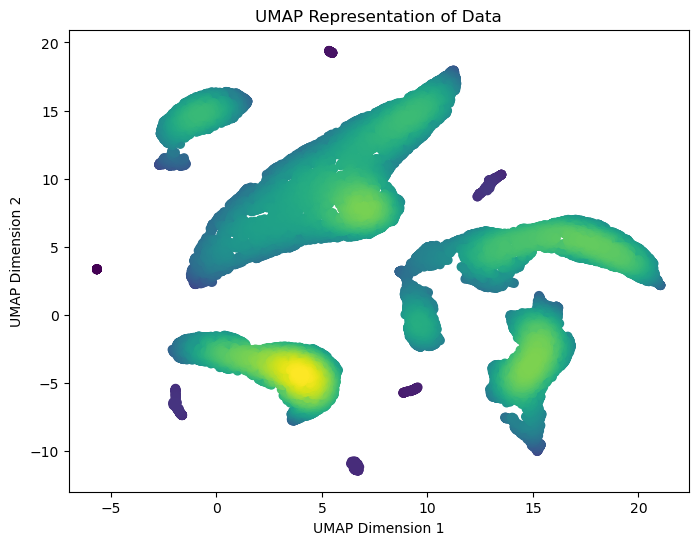

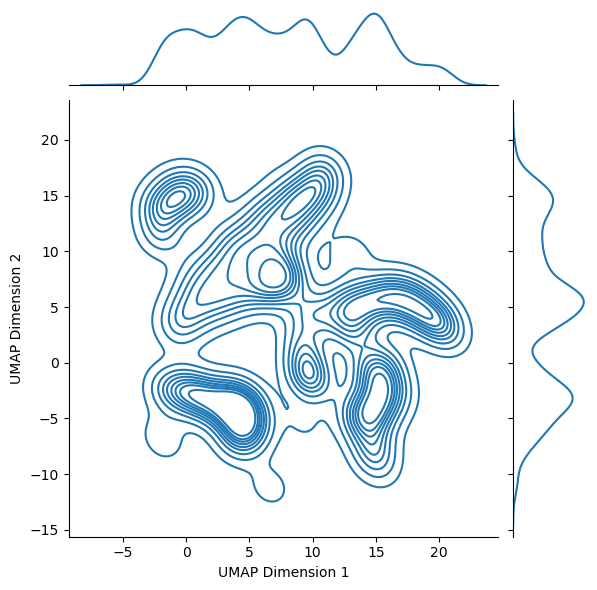

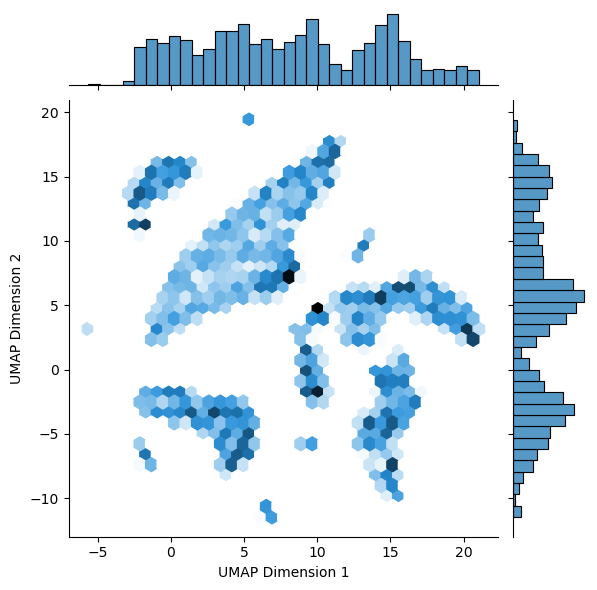

In [7]:
import numpy as np
import umap.umap_ as umap
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

# Assuming your data matrix is called 'data' with size (n, 3)
# where n is the number of samples and 3 is the number of features.

# Create a UMAP model with 2 components (dimensions)
umap_model = umap.UMAP(random_state=42,n_components=2)

# Fit the UMAP model to your data and transform it to 2 dimensions
embedding = umap_model.fit_transform(concat_data)

# Calculate KDE
x = embedding[:,0]
y = embedding[:,1]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
first, second, z = x[idx], y[idx], z[idx]

# Plot the embedded data with colors and shapes based on labels
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(first, second, c=z)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP Representation of Data')
plt.show()

import seaborn as sns
import pandas as pd

# Create a new DataFrame
new_df = pd.DataFrame({'Column1': x, 'Column2': y})
sns.jointplot(x=new_df['Column1'], y=new_df['Column2'], kind='kde')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

sns.jointplot(x=new_df['Column1'], y=new_df['Column2'], kind='hex')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()